In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### set default figsize
plt.rcParams['figure.figsize'] = (14,6)

restaurant_vis = pd.read_csv('rest_vis.csv')
restaurant_vis.head()

,date,weekday,holiday,total
0,1/1/2016,Friday,1,296.0
1,1/2/2016,Saturday,0,191.0
2,1/3/2016,Sunday,0,202.0
3,1/4/2016,Monday,0,105.0
4,1/5/2016,Tuesday,0,98.0


In [3]:
df = restaurant_vis.copy()

In [4]:
df.tail(40)

,date,weekday,holiday,total
477,4/22/2017,Saturday,0,226.0
478,4/23/2017,Sunday,0,NaN
479,4/24/2017,Monday,0,NaN
480,4/25/2017,Tuesday,0,NaN
481,4/26/2017,Wednesday,0,NaN
482,4/27/2017,Thursday,0,NaN
483,4/28/2017,Friday,0,NaN
484,4/29/2017,Saturday,0,NaN
485,4/30/2017,Sunday,0,NaN
486,5/1/2017,Monday,0,NaN


In [5]:
df.dropna(inplace = True)

In [6]:
df['date'].dtype

dtype('O')

In [7]:
df['date'] = pd.to_datetime(df['date'])
df['date'].dtype

dtype('<M8[ns]')

In [8]:
df.set_index('date',inplace = True)
df.head()

,weekday,holiday,total
date,,,
2016-01-01,Friday,1,296.0
2016-01-02,Saturday,0,191.0
2016-01-03,Sunday,0,202.0
2016-01-04,Monday,0,105.0
2016-01-05,Tuesday,0,98.0


In [9]:
max_train_index = int(len(df) * 0.9)
max_train_index

430

In [10]:
train = df.iloc[:430]
test = df.iloc[430:]

In [11]:
from sklearn.metrics import(
    mean_squared_error as mse,
    median_absolute_error as mae,
    mean_absolute_percentage_error as mape
)

def performance(actual, predicted):
    print(f"MAE : {mae(actual, predicted)}")
    print(f"RMSE : {mse(actual, predicted)}")
    print(f"MAPE : {mape(actual, predicted)}")

In [12]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['total'], seasonal_order=(1,0,1,7))

result = model.fit()
foreCast = result.forecast(42)

c:\Users\FPK1COB\Documents\Learning\TimeSeries\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\FPK1COB\Documents\Learning\TimeSeries\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [13]:
start=len(train)
end=len(train)+len(test)-1
predictions = result.predict(start=start, end=end)

MAE : 21.23659367097175
RMSE : 1004.1668842082087
MAPE : 0.2042259552997673


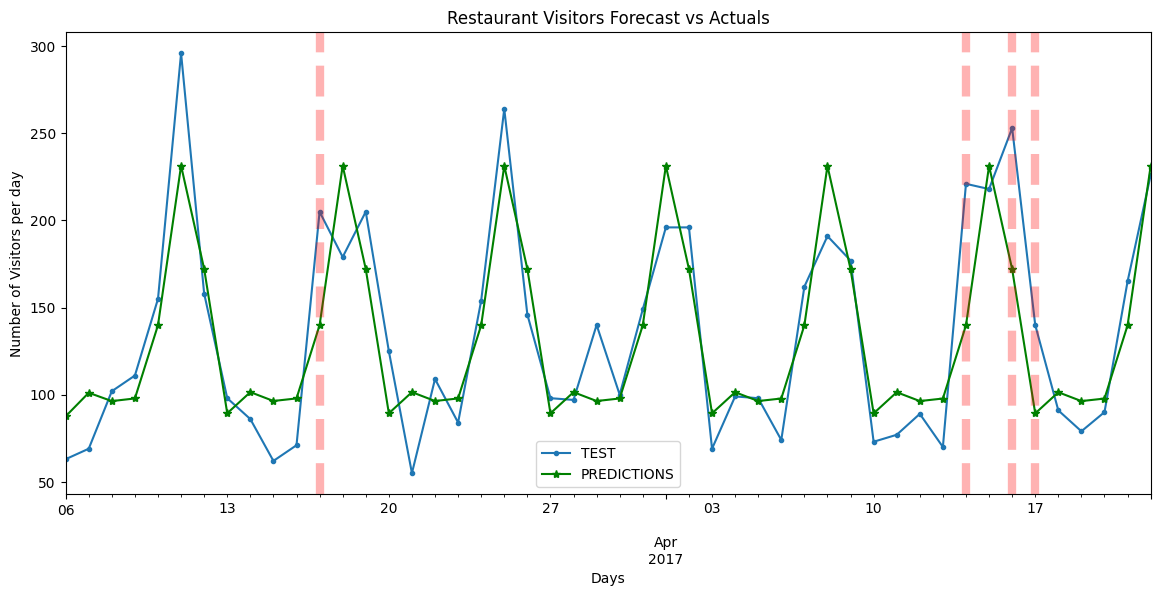

In [14]:
performance(test['total'], predictions)

title = "Restaurant Visitors Forecast vs Actuals"
ylabel = "Number of Visitors per day"
xlabel = "Days"
ax = test['total'].plot(legend=True, label='TEST', title=title, style= '.-')
predictions.plot(legend=True, label='PREDICTIONS', style='-*', color = 'green')
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

for x in test.query('holiday == 1').index:
    plt.axvline(x=x, color='red', linestyle='--', alpha=0.3, linewidth=6)

The above model is tested without considering holiday effect

Now let's try with Exogenous Variable

In [15]:
model = SARIMAX(train['total'],
                exog=train['holiday'],
                order=(1,0,0),
                seasonal_order=(1,0,1,7),
                )
# Train Model
results = model.fit()

c:\Users\FPK1COB\Documents\Learning\TimeSeries\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\FPK1COB\Documents\Learning\TimeSeries\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
